## Classification of handwritten digits using an MLP
Let's classifiy handwritten digits. After 5 years, I am again solving this simple problem.

## Step 1: Loading of dataset
Let's use sklearn to load and process

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import fetch_openml

In [6]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (60000, 784), Test set size: (10000, 784)


In [7]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
y_train = np.array(y_train).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)   

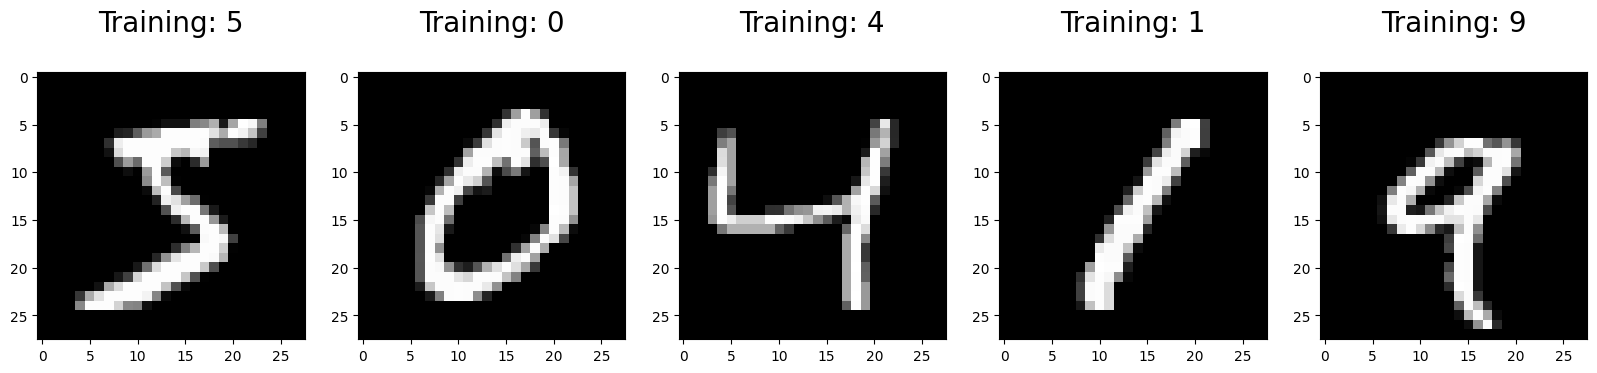

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## Step 2: Create and train Multi-Layer Perceptron using sklearn

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10,
                    alpha=1e-4, solver='sgd', verbose=10,
                    learning_rate_init=0.1,
                    random_state=42)   
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.31690536
Iteration 2, loss = 0.14540572
Iteration 3, loss = 0.10987280
Iteration 4, loss = 0.09011639
Iteration 5, loss = 0.07632231
Iteration 6, loss = 0.06652231
Iteration 7, loss = 0.05959550
Iteration 8, loss = 0.05247178
Iteration 9, loss = 0.04794973
Iteration 10, loss = 0.04213513


e:\WorldClass\learning-journal-oct2025\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'sgd'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,10
,shuffle,True
,random_state,42


In [12]:
# Show the accuracy on the training and test sets
print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Training set score: 0.9891833333333333
Test set score: 0.9731


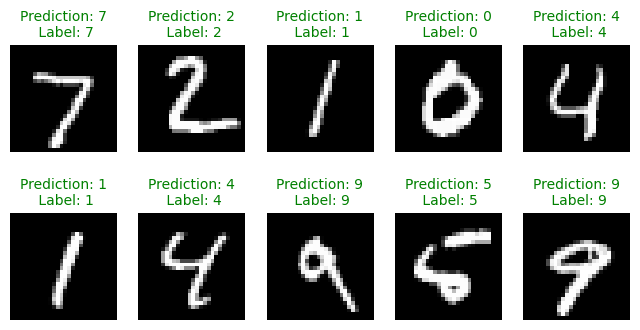

In [13]:
# Show the images, predictions, and original labels for 10 images

# Get the predictions for the test dataset
predictions = mlp.predict(X_test)

# Show the predictions in a grid
plt.figure(figsize=(8, 4))

for index, (image, prediction, label) in enumerate(
    zip(X_test[0:10], predictions[0:10], y_test[0:10])
):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)

    # Green if correct, red if incorrect
    fontcolor = "g" if prediction == label else "r"
    plt.title(
        "Prediction: %i\n Label: %i" % (prediction, label), fontsize=10, color=fontcolor
    )

    plt.axis("off")  # hide axes